In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [14]:
startup=pd.read_csv("50_Startups.csv")

In [15]:
start.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a734605910>,
 'caps': [<matplotlib.lines.Line2D at 0x1a734605fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a734605610>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7346106d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a734610a30>],
 'means': []}

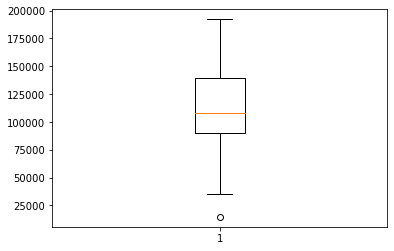

In [11]:

plt.boxplot(startup["Profit"])



In [18]:
Startup= pd.get_dummies(startup['State'])

In [20]:
startup= pd.concat([startup,Startup],axis=1)


In [24]:
startup= startup.iloc[:,[3,0,1,2,4,5,6]]

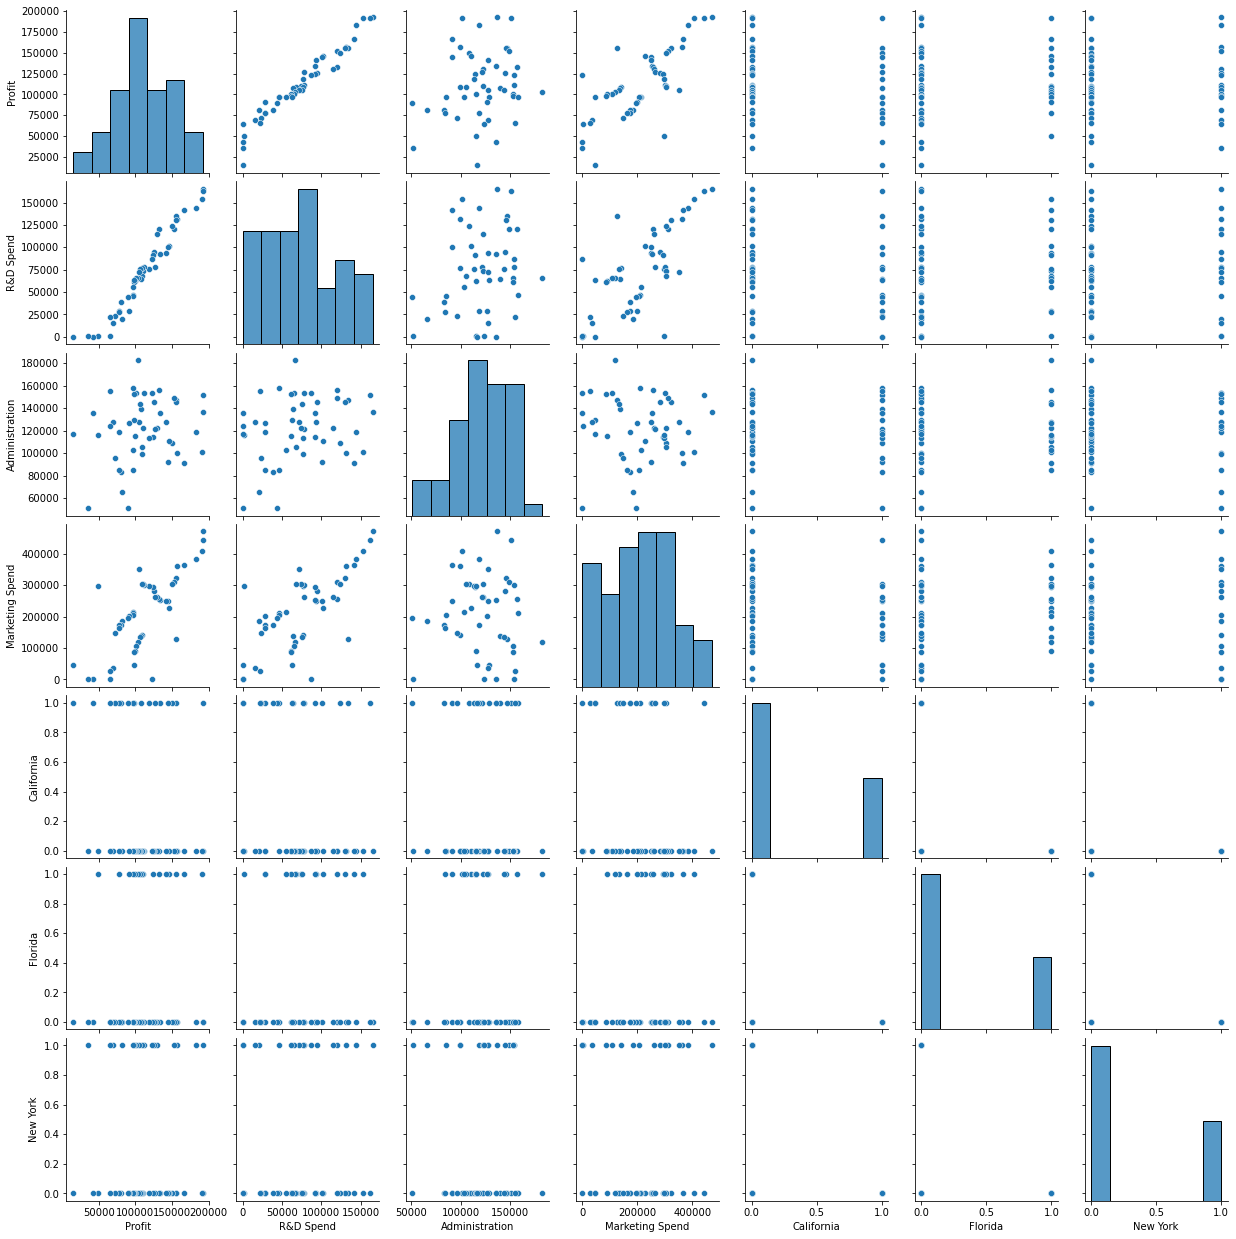

In [27]:
sns.pairplot(startup)
cor_values= startup.corr()

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
train_data,test_data= train_test_split(startup)

In [34]:
startup.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)


In [36]:

train_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)


In [38]:

test_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

In [40]:
train_data.to_csv("train_data.csv",encoding="utf-8")
test_data.to_csv("test_data.csv",encoding="utf-8")

In [42]:
model1= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork",data=train_data).fit()

In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.74e-19
Time:                        12:31:36   Log-Likelihood:                -389.90
No. Observations:                  37   AIC:                             791.8
Df Residuals:                      31   BIC:                             801.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.304e+04   7897.331      5.450      0.000    2.69e+04    5.91e+04
RnD                0.8330      0.057     14.713      0.000       0.717       0.948
Administration    -0.0887      0.077     -1.154      0.257      -0.245       0.068
Marketing          0.0186      0.022      0.866      0.393      -0.025       0.063
California      1.428e+04   3322.378      4.297      0.000    7499.100    2.11e+04
Florida         1.441e+04   3547.588      4.061      0.000    7172.542    2.16e+04
NewYork         1.436e+04   3776.963      3.801      0.001    6654.346    2.21e+04
==============================================================================
Omnibus:                       16.420   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.325
Skew:                          -1.232   Prob(JB):                     1.42e-05
Kurtosis:                       5.900   Cond. No.                     1.49e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
model1_ad= smf.ols("Profit~Administration", data= train_data).fit()

In [48]:
model1_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.03957
Date:                Sat, 31 Jul 2021   Prob (F-statistic):              0.843
Time:                        12:32:01   Log-Likelihood:                -446.05
No. Observations:                  37   AIC:                             896.1
Df Residuals:                      35   BIC:                             899.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.069e+05   3.76e+04      2.838      0.008    3.04e+04    1.83e+05
Administration     0.0592      0.298      0.199      0.843      -0.545       0.664
==============================================================================
Omnibus:                        0.016   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.097
Skew:                           0.032   Prob(JB):                        0.953
Kurtosis:                       2.758   Cond. No.                     6.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model1_ma = smf.ols("Profit~Marketing", data= train_data).fit()

In [52]:
model1_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     47.16
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           5.67e-08
Time:                        12:32:29   Log-Likelihood:                -430.28
No. Observations:                  37   AIC:                             864.6
Df Residuals:                      35   BIC:                             867.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.812e+04   9372.006      6.201      0.000    3.91e+04    7.71e+04
Marketing      0.2505      0.036      6.867      0.000       0.176       0.325
==============================================================================
Omnibus:                        5.979   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                4.607
Skew:                          -0.665   Prob(JB):                       0.0999
Kurtosis:                       4.105   Cond. No.                     5.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model1_com= smf.ols("Profit~Administration+Marketing", data= train_data).fit()

In [56]:
model1_com.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     26.75
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.05e-07
Time:                        12:32:55   Log-Likelihood:                -428.58
No. Observations:                  37   AIC:                             863.2
Df Residuals:                      34   BIC:                             868.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.184e+04   2.71e+04      0.436      0.665   -4.33e+04     6.7e+04
Administration     0.3483      0.193      1.809      0.079      -0.043       0.740
Marketing          0.2639      0.036      7.307      0.000       0.191       0.337
==============================================================================
Omnibus:                        6.736   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                5.529
Skew:                          -0.695   Prob(JB):                       0.0630
Kurtosis:                       4.286   Cond. No.                     1.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
import statsmodels.api as sm

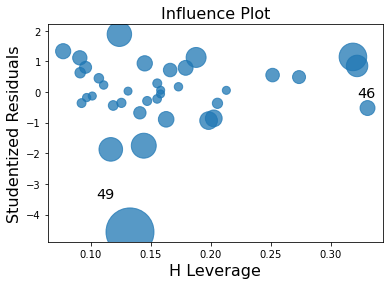

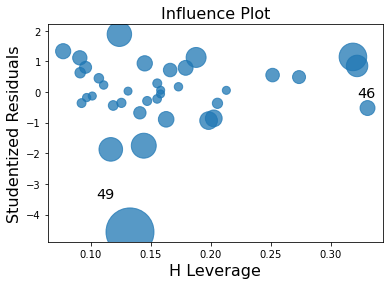

In [62]:
sm.graphics.influence_plot(model1)

In [64]:
train_data1= train_data.drop(train_data.index[[4]], axis=0)

In [66]:
model2= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data1).fit()

In [68]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.92e-19
Time:                        12:34:49   Log-Likelihood:                -378.09
No. Observations:                  36   AIC:                             768.2
Df Residuals:                      30   BIC:                             777.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.064e+04   7767.432      5.232      0.000    2.48e+04    5.65e+04
RnD                0.8453      0.055     15.296      0.000       0.732       0.958
Administration    -0.0635      0.076     -0.839      0.408      -0.218       0.091
Marketing          0.0167      0.021      0.799      0.430      -0.026       0.059
California      1.313e+04   3282.457      3.999      0.000    6423.292    1.98e+04
Florida         1.454e+04   3435.306      4.232      0.000    7521.151    2.16e+04
NewYork         1.297e+04   3740.744      3.468      0.002    5334.319    2.06e+04
==============================================================================
Omnibus:                       16.871   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.446
Skew:                          -1.230   Prob(JB):                     4.92e-06
Kurtosis:                       6.201   Cond. No.                     3.76e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
train_data2 = train_data.drop(train_data.index[[4,24]],axis=0)

In [72]:
model3 = smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data2).fit()

In [74]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     126.3
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           9.10e-19
Time:                        12:35:28   Log-Likelihood:                -368.08
No. Observations:                  35   AIC:                             748.2
Df Residuals:                      29   BIC:                             757.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.063e+04   7913.853      5.134      0.000    2.44e+04    5.68e+04
RnD                0.8453      0.056     15.036      0.000       0.730       0.960
Administration    -0.0634      0.078     -0.813      0.423      -0.223       0.096
Marketing          0.0166      0.021      0.779      0.443      -0.027       0.060
California      1.312e+04   3393.245      3.866      0.001    6178.379    2.01e+04
Florida         1.453e+04   3519.835      4.128      0.000    7332.066    2.17e+04
NewYork         1.298e+04   3846.760      3.375      0.002    5114.489    2.08e+04
==============================================================================
Omnibus:                       16.077   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.997
Skew:                          -1.214   Prob(JB):                     1.67e-05
Kurtosis:                       6.031   Cond. No.                     2.35e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.48e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
rsq_rnd = smf.ols("RnD~Administration+Marketing+California+Florida+NewYork", data= train_data2).fit().rsquared

In [78]:
ViF_rnd = 1/(1-rsq_rnd)

In [80]:
rsq_adm = smf.ols("Administration~RnD+Marketing+California+Florida+NewYork", data=train_data2).fit().rsquared

In [82]:
ViF_adm = 1/(1-rsq_adm)

In [84]:
rsq_mar = smf.ols("Marketing ~ RnD+Administration+California+Florida+NewYork", data= train_data2).fit().rsquared

In [86]:
ViF_mar = 1/(1-rsq_mar)

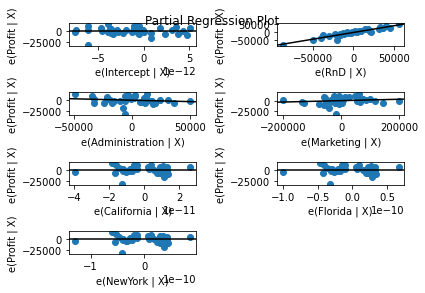

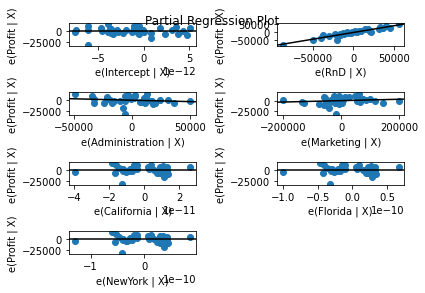

In [88]:
sm.graphics.plot_partregress_grid(model2)

In [90]:
model3= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()

In [92]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           9.29e-20
Time:                        12:37:44   Log-Likelihood:                -368.48
No. Observations:                  35   AIC:                             747.0
Df Residuals:                      30   BIC:                             754.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.458e+04   2680.756     12.899      0.000    2.91e+04    4.01e+04
RnD            0.8299      0.053     15.776      0.000       0.722       0.937
Marketing      0.0232      0.020      1.175      0.249      -0.017       0.063
California   1.11e+04   2300.869      4.824      0.000    6400.701    1.58e+04
Florida     1.252e+04   2486.179      5.034      0.000    7438.462    1.76e+04
NewYork     1.096e+04   2922.987      3.751      0.001    4994.390    1.69e+04
==============================================================================
Omnibus:                       13.504   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.509
Skew:                          -1.067   Prob(JB):                     0.000260
Kurtosis:                       5.601   Cond. No.                     2.94e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
finalmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()

In [96]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           9.29e-20
Time:                        12:38:09   Log-Likelihood:                -368.48
No. Observations:                  35   AIC:                             747.0
Df Residuals:                      30   BIC:                             754.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.458e+04   2680.756     12.899      0.000    2.91e+04    4.01e+04
RnD            0.8299      0.053     15.776      0.000       0.722       0.937
Marketing      0.0232      0.020      1.175      0.249      -0.017       0.063
California   1.11e+04   2300.869      4.824      0.000    6400.701    1.58e+04
Florida     1.252e+04   2486.179      5.034      0.000    7438.462    1.76e+04
NewYork     1.096e+04   2922.987      3.751      0.001    4994.390    1.69e+04
==============================================================================
Omnibus:                       13.504   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.509
Skew:                          -1.067   Prob(JB):                     0.000260
Kurtosis:                       5.601   Cond. No.                     2.94e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
train_pred = finalmodel.predict(train_data2)

In [100]:
train_res= train_data2["Profit"]-train_pred

In [102]:
train_rmse = np.sqrt(np.mean(train_res*train_res))

In [104]:
test_pred = finalmodel.predict(test_data)

In [106]:
test_res= test_data["Profit"]- test_pred

In [108]:
test_rmse = np.sqrt(np.mean(test_res*test_res))

In [110]:
startup1= startup.drop(startup.index[[4,24]],axis=0)

In [112]:
bestmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data =startup1).fit()

In [114]:
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     200.4
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           3.35e-27
Time:                        12:40:21   Log-Likelihood:                -505.22
No. Observations:                  48   AIC:                             1020.
Df Residuals:                      43   BIC:                             1030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2158.528     16.332      0.000    3.09e+04    3.96e+04
RnD            0.8017      0.044     18.327      0.000       0.713       0.890
Marketing      0.0290      0.017      1.750      0.087      -0.004       0.062
California  1.153e+04   1959.390      5.886      0.000    7581.153    1.55e+04
Florida     1.199e+04   2231.189      5.376      0.000    7495.179    1.65e+04
NewYork     1.172e+04   2091.061      5.607      0.000    7507.870    1.59e+04
==============================================================================
Omnibus:                       14.156   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.900
Skew:                          -0.965   Prob(JB):                     7.87e-05
Kurtosis:                       5.392   Cond. No.                     1.20e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [116]:
bestmodel_pred = bestmodel.predict(startup1)

Text(0, 0.5, 'Fitted values')

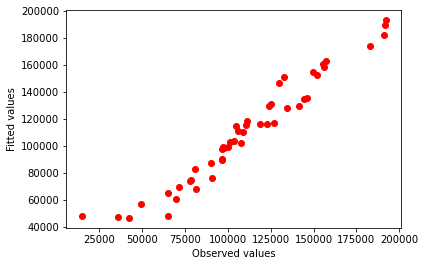

In [118]:
plt.scatter(startup1.Profit,bestmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Fitted values")

Text(0, 0.5, 'Residuals')

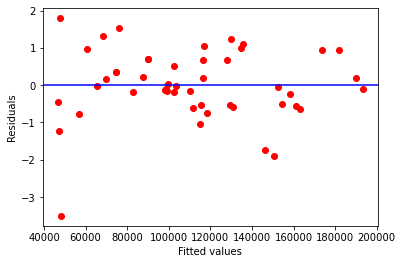

In [120]:
plt.scatter(bestmodel_pred,bestmodel.resid_pearson, c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

(array([ 1.,  0.,  0.,  2.,  2., 10., 15.,  8.,  7.,  3.]),
 array([-3.50866306, -2.97830915, -2.44795525, -1.91760135, -1.38724745,
        -0.85689354, -0.32653964,  0.20381426,  0.73416816,  1.26452207,
         1.79487597]),
 <BarContainer object of 10 artists>)

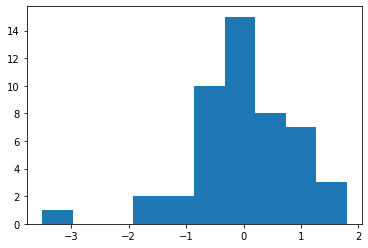

In [122]:
plt.hist(bestmodel.resid_pearson)

In [124]:
import pylab
import scipy.stats as st

((array([-2.18794508, -1.81466696, -1.5940389 , -1.43152593, -1.29991017,
         -1.18761792, -1.08858668, -0.99921942, -0.91719469, -0.84091983,
         -0.76924975, -0.7013297 , -0.63650166, -0.57424545, -0.51414026,
         -0.45583845, -0.39904728, -0.34351563, -0.28902427, -0.23537844,
         -0.18240202, -0.12993297, -0.07781945, -0.02591656,  0.02591656,
          0.07781945,  0.12993297,  0.18240202,  0.23537844,  0.28902427,
          0.34351563,  0.39904728,  0.45583845,  0.51414026,  0.57424545,
          0.63650166,  0.7013297 ,  0.76924975,  0.84091983,  0.91719469,
          0.99921942,  1.08858668,  1.18761792,  1.29991017,  1.43152593,
          1.5940389 ,  1.81466696,  2.18794508]),
  array([-3.50866306, -1.91417586, -1.72759685, -1.23268811, -1.05039156,
         -0.77854107, -0.75465648, -0.65273938, -0.6074688 , -0.59579298,
         -0.55969506, -0.53273591, -0.52478929, -0.49680024, -0.44370809,
         -0.23933784, -0.18459717, -0.17530937, -0.16016657, -

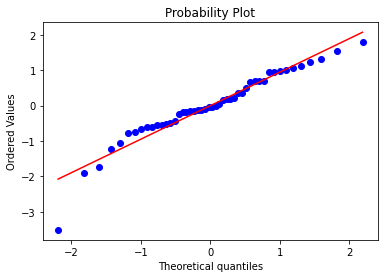

In [126]:
st.probplot(bestmodel.resid_pearson, dist='norm', plot=pylab)

Text(0, 0.5, 'Residuals')

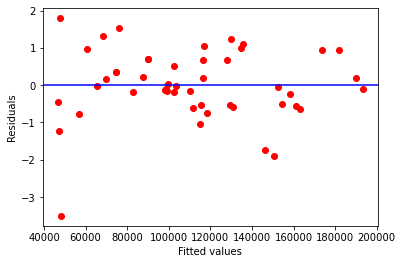

In [127]:
plt.scatter(bestmodel_pred,bestmodel.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")